In [11]:
import pandas as pd
import glob

# Specify the path to your CSV files
path = '/Users/samkhatri/Downloads/Median_home_prices/*.csv'  # Change this to your actual path

# Use glob to find all CSV files in the directory
all_files = glob.glob(path)

# Create an empty list to store DataFrames
df_list = []

# Loop through the files and read them into a DataFrame
for file in all_files:
    df = pd.read_csv(file)
    df_list.append(df)

# Concatenate all DataFrames in the list
combined_df = pd.concat(df_list, ignore_index=True)

In [17]:
all_files

['/Users/samkhatri/Downloads/Median_home_prices/MSPMidWest.csv',
 '/Users/samkhatri/Downloads/Median_home_prices/MSPNortEast.csv',
 '/Users/samkhatri/Downloads/Median_home_prices/MSPSouth.csv',
 '/Users/samkhatri/Downloads/Median_home_prices/MSPWest.csv']

In [37]:
df4 = pd.read_csv('/Users/samkhatri/Downloads/Median_home_prices/MSPWest.csv')

In [38]:
df4['Region'] = 'West'

In [50]:
df4

,DATE,MSPW,Region
0,1963-01-01,18000.0,West
1,1963-04-01,18900.0,West
2,1963-07-01,19000.0,West
3,1963-10-01,19500.0,West
4,1964-01-01,19600.0,West
...,...,...,...
242,2023-07-01,513200.0,West
243,2023-10-01,520700.0,West
244,2024-01-01,552500.0,West
245,2024-04-01,529900.0,West


In [67]:
main_df= pd.concat([df1_yearly, df2_yearly, df3_yearly, df4_yearly], ignore_index=True)

In [51]:
df4.rename(columns={'MSPW': 'Median Sale Price'}, inplace=True)

In [57]:
df1

,DATE,Median Sale Price,Region
0,1963-01-01,17500.0,Midwest
1,1963-04-01,17700.0,Midwest
2,1963-07-01,17800.0,Midwest
3,1963-10-01,19100.0,Midwest
4,1964-01-01,18700.0,Midwest
...,...,...,...
242,2023-07-01,423100.0,Midwest
243,2023-10-01,370800.0,Midwest
244,2024-01-01,386800.0,Midwest
245,2024-04-01,381400.0,Midwest


In [66]:
import pandas as pd

# Convert DATE to datetime format
df4['DATE'] = pd.to_datetime(df4['DATE'])

# Extract year from DATE and create a new column 'Year'
df4['Year'] = df4['DATE'].dt.year

# Group by 'Year' and 'Region' and aggregate the 'Median Sale Price'
# Choose an aggregation function, e.g., mean, median, sum, etc.
df4_yearly = df4.groupby(['Year', 'Region']).agg({'Median Sale Price': 'mean'}).reset_index()


In [63]:
df1_yearly

,Year,Region,Median Sale Price
0,1963,Midwest,18025.000000
1,1964,Midwest,19550.000000
2,1965,Midwest,21475.000000
3,1966,Midwest,23400.000000
4,1967,Midwest,24975.000000
...,...,...,...
57,2020,Midwest,293250.000000
58,2021,Midwest,340825.000000
59,2022,Midwest,388700.000000
60,2023,Midwest,393150.000000


In [68]:
main_df

,Year,Region,Median Sale Price
0,1963,Midwest,18025.000000
1,1964,Midwest,19550.000000
2,1965,Midwest,21475.000000
3,1966,Midwest,23400.000000
4,1967,Midwest,24975.000000
...,...,...,...
243,2020,West,411900.000000
244,2021,West,501450.000000
245,2022,West,568275.000000
246,2023,West,533900.000000


In [69]:
# Pivoting the DataFrame
pivoted_df = main_df.pivot(index='Region', columns='Year', values='Median Sale Price')


In [78]:
pivoted_df.to_csv('MSPUS.csv', index = False)

In [76]:
pivoted_df.reset_index(inplace = True)

In [14]:
msp = pd.read_csv("MSPUS.csv")

In [15]:
msp

,Region,1963,1964,1965,1966,1967,1968,1969,1970,1971,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Midwest,18025.0,19550.0,21475.0,23400.0,24975.0,27400.0,27775.0,25000.0,27175.0,...,275225.0,277975.0,282100.0,290300.0,285350.0,293250.0,340825.0,388700.0,393150.0,384233.333333
1,NorthEast,20400.0,20425.0,21800.0,23625.0,25575.0,27800.0,31350.0,30275.0,30925.0,...,435050.0,427225.0,495250.0,478550.0,486675.0,505100.0,564950.0,613375.0,768375.0,725766.666667
2,South,16075.0,16700.0,17400.0,18425.0,19325.0,21475.0,22625.0,20375.0,22525.0,...,270125.0,280150.0,290150.0,292200.0,288300.0,290550.0,336975.0,387400.0,385600.0,375533.333333
3,West,18850.0,20450.0,21900.0,23100.0,24075.0,25125.0,25325.0,24075.0,25450.0,...,347325.0,367625.0,388500.0,411075.0,407625.0,411900.0,501450.0,568275.0,533900.0,543866.666667


In [4]:
import pandas as pd
housing_data = pd.read_csv("MSPUS (1).csv")
# Convert the 'DATE' column to datetime format
housing_data['DATE'] = pd.to_datetime(housing_data['DATE'])

/Users/samkhatri/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/samkhatri/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


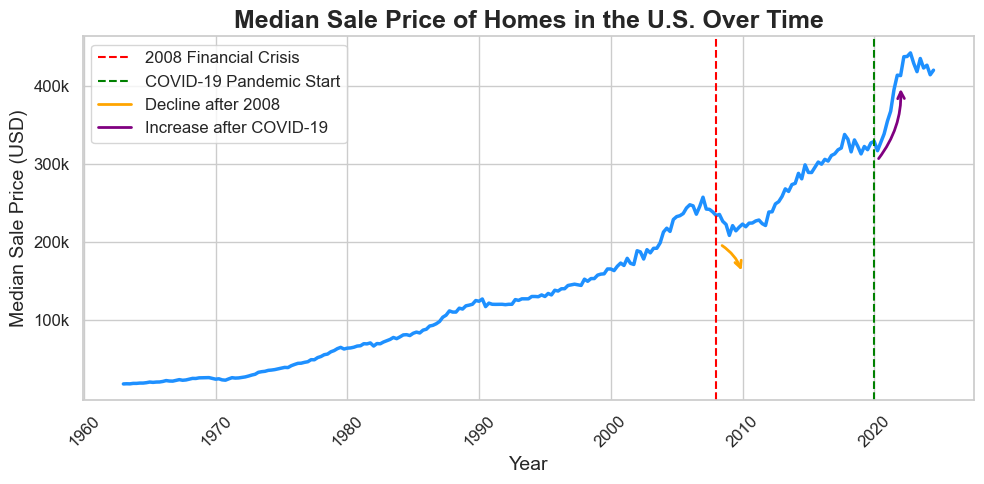

In [13]:
# Create a line chart for the median sale price (MSPUS) over time with arrows and legend for trends
plt.figure(figsize=(10, 5))
sns.lineplot(data=housing_data, x='DATE', y='MSPUS', color='dodgerblue', linewidth=2.5)

# Adding annotations for significant economic events
plt.axvline(pd.Timestamp('2008-01-01'), color='red', linestyle='--', linewidth=1.5, label='2008 Financial Crisis')
plt.axvline(pd.Timestamp('2020-01-01'), color='green', linestyle='--', linewidth=1.5, label='COVID-19 Pandemic Start')

# Adding arrows to indicate trends
plt.annotate('', xy=(pd.Timestamp('2010-01-01'), 160000), xytext=(pd.Timestamp('2008-01-01'), 200000),
             arrowprops=dict(arrowstyle='->', color='orange', lw=2, shrinkA=5, connectionstyle="arc3,rad=-0.2"))
plt.annotate('', xy=(pd.Timestamp('2022-01-01'), 400000), xytext=(pd.Timestamp('2020-01-01'), 300000),
             arrowprops=dict(arrowstyle='->', color='purple', lw=2, shrinkA=5, connectionstyle="arc3,rad=0.2"))

# Adding titles and labels
plt.title('Median Sale Price of Homes in the U.S. Over Time', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Median Sale Price (USD)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.yticks(ticks=[100000, 200000, 300000, 400000, 500000], labels=['100k', '200k', '300k', '400k', '500k'])

# Adding a legend for the arrows
plt.plot([], [], color='orange', lw=2, label='Decline after 2008')
plt.plot([], [], color='purple', lw=2, label='Increase after COVID-19')
plt.legend(fontsize=12)

plt.grid(True)

# Show the plot with arrows indicating trends
plt.tight_layout()
plt.show()


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

mortgage_data = pd.read_csv('/Users/samkhatri/Downloads/data_6600/MORTGAGE30US.csv')

# Convert the 'DATE' column to datetime format
mortgage_data['DATE'] = pd.to_datetime(mortgage_data['DATE'])

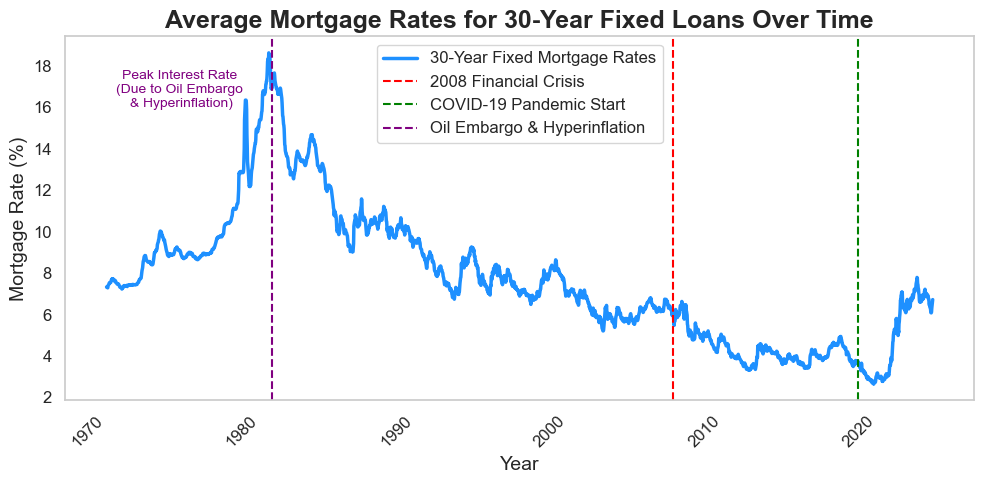

In [38]:
# Create a line chart for the average mortgage rates (MORTGAGE30US) over time
plt.figure(figsize=(10, 5))
plt.plot(mortgage_data['DATE'], mortgage_data['MORTGAGE30US'], label='30-Year Fixed Mortgage Rates', color='dodgerblue', linewidth=2.5)

# Adding annotations for significant economic events
plt.axvline(pd.Timestamp('2008-01-01'), color='red', linestyle='--', label='2008 Financial Crisis')
plt.axvline(pd.Timestamp('2020-01-01'), color='green', linestyle='--', label='COVID-19 Pandemic Start')
plt.axvline(pd.Timestamp('1982-01-01'), color='purple', linestyle='--', label='Oil Embargo & Hyperinflation')

# Adding annotations for 1981 peak interest rates
plt.text(pd.Timestamp('1976-01-01'), 16, 'Peak Interest Rate\n(Due to Oil Embargo\n & Hyperinflation)', 
         color='purple', fontsize=10, ha='center')

# Adding titles and labels
plt.title('Average Mortgage Rates for 30-Year Fixed Loans Over Time', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mortgage Rate (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()


In [68]:
import pandas as pd

housing_data = pd.read_csv('Homes Sold AR_data.csv')

In [70]:
# Remove 'M' and convert the values to floats
housing_data["Homes Sold(in M)"] = housing_data["Homes Sold(in M)"].str.replace("M", "").astype(float)


,Month,Region Name,Homes Sold AR,Homes Sold(in M)
0,1/1/12,West,1.187229e+06,1.2
1,2/1/12,West,1.181765e+06,1.2
2,3/1/12,West,1.169904e+06,1.2
3,4/1/12,West,1.136152e+06,1.1
4,5/1/12,West,1.101583e+06,1.1
...,...,...,...,...
760,5/1/24,Midwest,1.035551e+06,1.0
761,6/1/24,Midwest,1.013883e+06,1.0
762,7/1/24,Midwest,1.018453e+06,1.0
763,8/1/24,Midwest,1.002015e+06,1.0


/var/folders/29/5h46lrgs74l2sh3vpzm338fh0000gn/T/ipykernel_32373/1642498829.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  national_only_data['Month'] = pd.to_datetime(national_only_data['Month'])
/var/folders/29/5h46lrgs74l2sh3vpzm338fh0000gn/T/ipykernel_32373/1642498829.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  national_only_data['Month'] = pd.to_datetime(national_only_data['Month'])


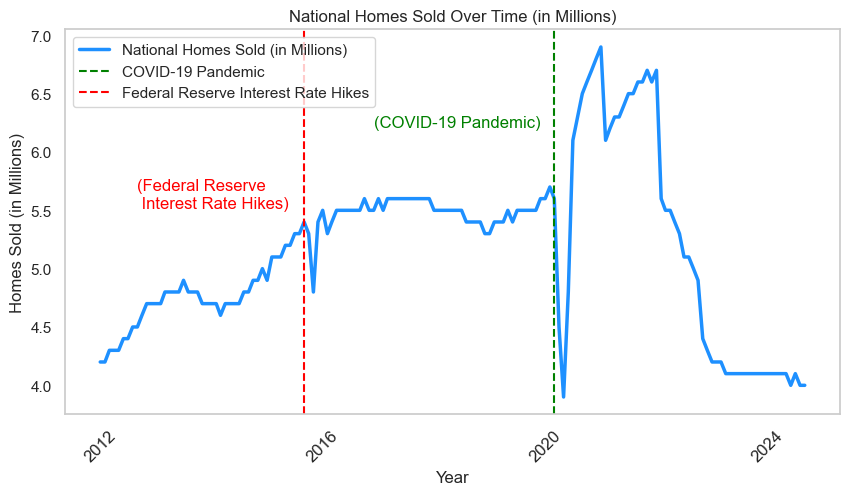

In [111]:
# Filter the dataset to include only the rows where 'Region Name' is "National"
national_only_data = housing_data[housing_data['Region Name'] == 'National']

# Ensure 'Month' column in the filtered data is in datetime format
national_only_data['Month'] = pd.to_datetime(national_only_data['Month'])

# Plot the national trend for homes sold using the correctly filtered data for only "National" region
plt.figure(figsize=(10, 5))
plt.plot(national_only_data['Month'], national_only_data['Homes Sold(in M)'], label='National Homes Sold (in Millions)', color='dodgerblue', linewidth=2.5)
plt.title('National Homes Sold Over Time (in Millions)')
plt.xlabel('Year')
plt.ylabel('Homes Sold (in Millions)')
plt.legend()

# Mark significant economic events
# plt.axvline(x=pd.Timestamp('2008-09-01'), color='red', linestyle='--', label='2008 Housing Crisis')
plt.axvline(x=pd.Timestamp('2020-03-01'), color='green', linestyle='--', label='COVID-19 Pandemic')
plt.axvline(x=pd.Timestamp('2015-09-01'), color='red', linestyle='--', label='Federal Reserve Interest Rate Hikes')
plt.annotate('2008 Housing Crisis', xy=(pd.Timestamp('2008-09-01'), max(national_only_data['Homes Sold(in M)'])*0.8),
             xytext=(pd.Timestamp('2009-01-01'), max(national_only_data['Homes Sold(in M)'])*0.9),
             arrowprops=dict(facecolor='red', arrowstyle='->'))
plt.annotate('(COVID-19 Pandemic)', xy=(pd.Timestamp('2016-03-01'), max(national_only_data['Homes Sold(in M)'])*0.8),
             xytext=(pd.Timestamp('2016-12-01'), max(national_only_data['Homes Sold(in M)'])*0.9),
             arrowprops=dict(facecolor='blue', arrowstyle='->'), color='green')

plt.annotate('(Federal Reserve\n Interest Rate Hikes)', xy=(pd.Timestamp('2012-09-01'), max(national_only_data['Homes Sold(in M)'])*0.8),
             xytext=(pd.Timestamp('2012-09-01'), max(national_only_data['Homes Sold(in M)'])*0.8),
             arrowprops=dict(facecolor='blue', arrowstyle='->'), color='red')

# Formatting x-axis for dates
plt.gca().xaxis.set_major_locator(mdates.YearLocator(4))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, fontsize=12)
plt.grid()
plt.legend()
plt.show()



In [112]:
import pandas as pd

df = pd.read_csv('Reshaped_Housing_Data_2012_onward.csv')

In [113]:
df['12yr_diff'] = df['2024'] - df['2012']

,Region Name,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Midwest,1.056468e+06,1.224377e+06,1.183301e+06,1.313598e+06,1.345450e+06,1.359961e+06,1.331054e+06,1.313429e+06,1.303231e+06,1.467945e+06,1.287748e+06,1.046103e+06,1.023145e+06
1,National,4.379472e+06,4.816620e+06,4.732168e+06,5.249680e+06,5.453316e+06,5.585714e+06,5.461234e+06,5.446972e+06,5.394585e+06,6.380449e+06,5.260560e+06,4.146392e+06,4.055501e+06
2,Northeast,5.357200e+05,6.014856e+05,5.978392e+05,6.735424e+05,7.475450e+05,7.745195e+05,7.723787e+05,7.763196e+05,7.282274e+05,8.713666e+05,7.398169e+05,5.860582e+05,5.770803e+05
3,South,1.633643e+06,1.879048e+06,1.866952e+06,2.082180e+06,2.140247e+06,2.200964e+06,2.199386e+06,2.237941e+06,2.212586e+06,2.596560e+06,2.167901e+06,1.741945e+06,1.680102e+06
4,West,1.126629e+06,1.156750e+06,1.092116e+06,1.223782e+06,1.222803e+06,1.253605e+06,1.208410e+06,1.195801e+06,1.110228e+06,1.367310e+06,1.087706e+06,8.187934e+05,8.195165e+05


In [132]:
import pandas as pd

# Load the datasets for each region
file_paths = {
    'Northeast': 'House_inv_NE.xlsx',
    'South': 'House_inv_S.xlsx',
    'Midwest': 'House_inv_MW.xlsx',
    'West': 'House_inv_W.xlsx'
}

# Read and store data for each region
data = {region: pd.read_excel(file_path) for region, file_path in file_paths.items()}

# Check the structure of the datasets to understand how to proceed with plotting
data_summary = {region: df.head() for region, df in data.items()}



In [126]:
# Define consistent colors for each category
category_colors = {
    "Vacant Houses (For Rent)": '#1f77b4',  # Blue
    "Vacant Houses (For Sale)": '#ff7f0e'   # Orange
}



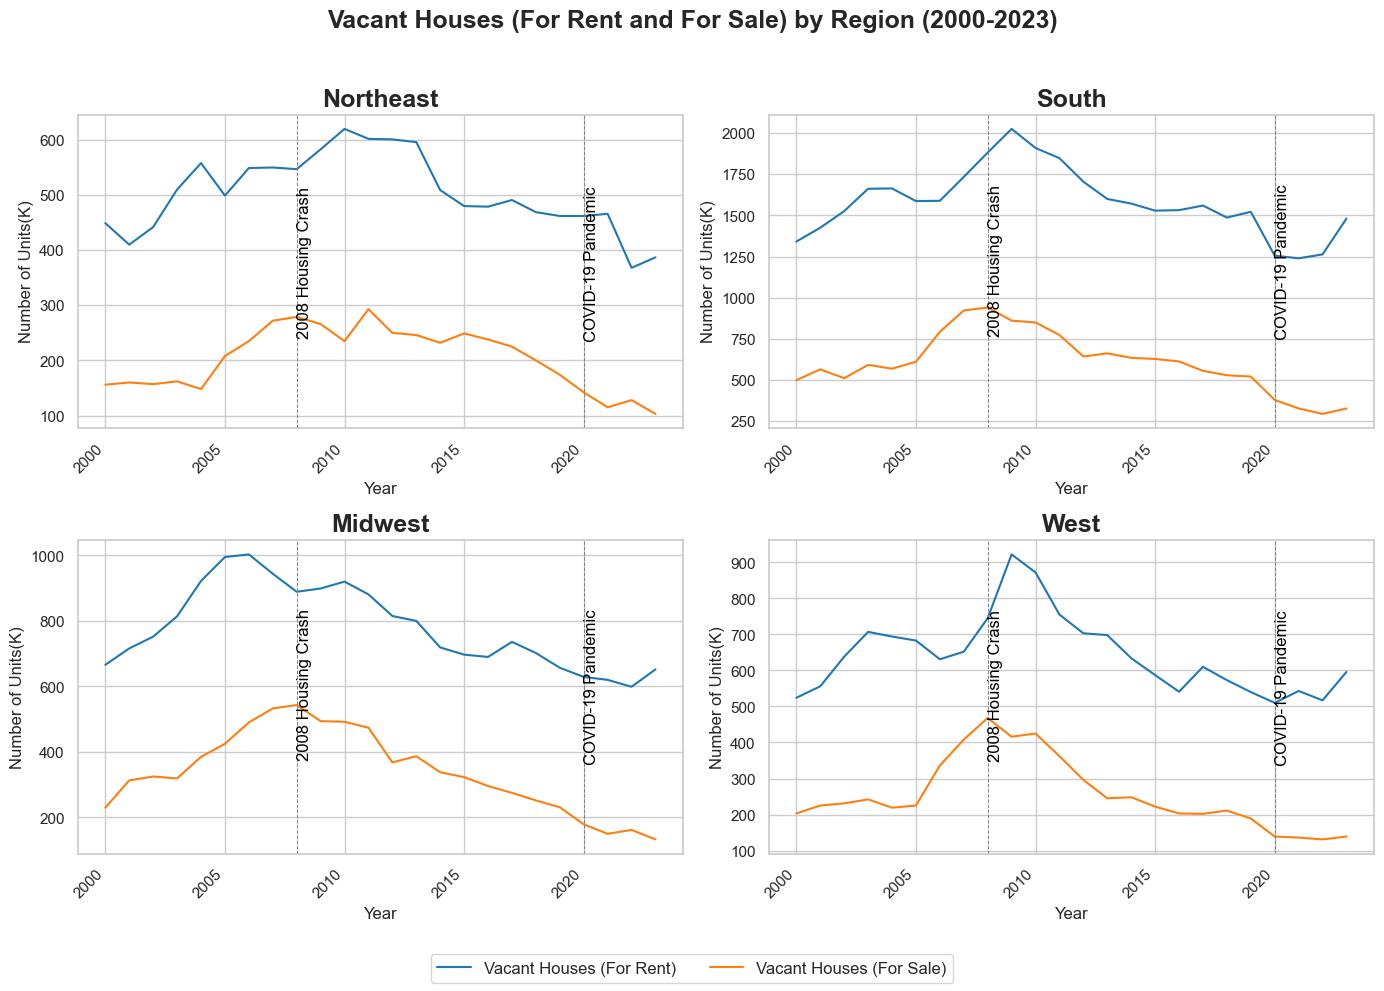

In [134]:
# Adjusting the x-axis ticks to display only every 5 years (2000, 2005, 2010, 2015, 2020)
# Create a figure with 4 subplots, one for each region
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Vacant Houses (For Rent and For Sale) by Region (2000-2023)', fontsize=18, fontweight='bold')

# Define the specific ticks for years we want to show
selected_years = [2000, 2005, 2010, 2015, 2020]

# Plot data for each region
for idx, (region, df) in enumerate(data.items()):
    ax = axes[idx // 2, idx % 2]
    
    # Plot "Vacant Houses (For Rent)" and "Vacant Houses (For Sale)"
    for category, color in category_colors.items():
        category_data = df[df['Category'] == category].iloc[:, 1:].values.flatten()
        ax.plot(years, category_data, label=category, color=color)
    
    # Highlight major economic events on the chart
    for event_year, label in events.items():
        ax.axvline(x=event_year, color='gray', linestyle='--', linewidth=0.7)
        ax.text(event_year, ax.get_ylim()[1] * 0.8, label, rotation=90, verticalalignment='top', color='black')
    
    # Set titles, labels, and select specific x-ticks
    ax.set_title(f"{region}", fontsize=18, fontweight='bold')
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of Units(K)")
    ax.set_xticks(selected_years)  # Only show every 5 years
    ax.set_xticklabels(selected_years, rotation=45, ha='right')  # Rotate labels for readability

# Common legend and layout adjustments
fig.legend(category_colors.keys(), loc="lower center", ncol=2, fontsize='medium')
plt.tight_layout(rect=[0, 0.05, 1, 0.96])
plt.show()


In [157]:
# Re-importing necessary libraries and data as the previous state is lost
import pandas as pd

# Reload the datasets
file1_path = 'data1.csv'
file2_path = 'data2.csv'

# Read the CSV files
data1 = pd.read_csv(file1_path)
data2 = pd.read_csv(file2_path)

# Convert the DATE and Month columns to a common datetime format for merging
data1['DATE'] = pd.to_datetime(data1['DATE'])
data2['Month'] = pd.to_datetime(data2['Month'])

# Merge the datasets on the date columns
merged_data = pd.merge(data1, data2, left_on='DATE', right_on='Month', how='inner')

# Select only relevant columns for correlation
selected_data = merged_data[['MORTGAGE30US', 'Homes Sold(in M)']]

# Calculate the correlation matrix for selected columns
selected_correlation_matrix = selected_data.corr()

selected_correlation_matrix


,MORTGAGE30US,Homes Sold(in M)
MORTGAGE30US,1.000000,-0.787496
Homes Sold(in M),-0.787496,1.000000


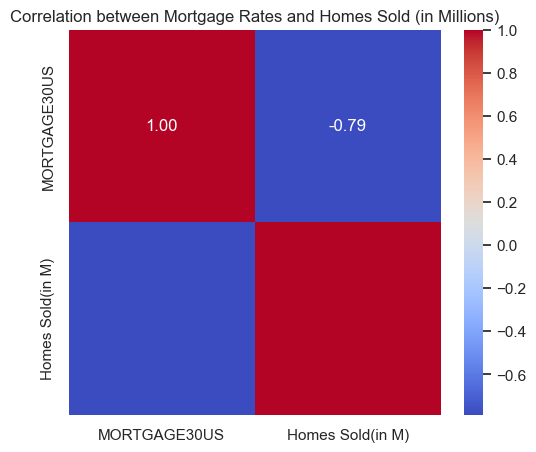

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the correlation between Mortgage Rate and Homes Sold (in Millions) using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(selected_correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Mortgage Rates and Homes Sold (in Millions)")
plt.show()


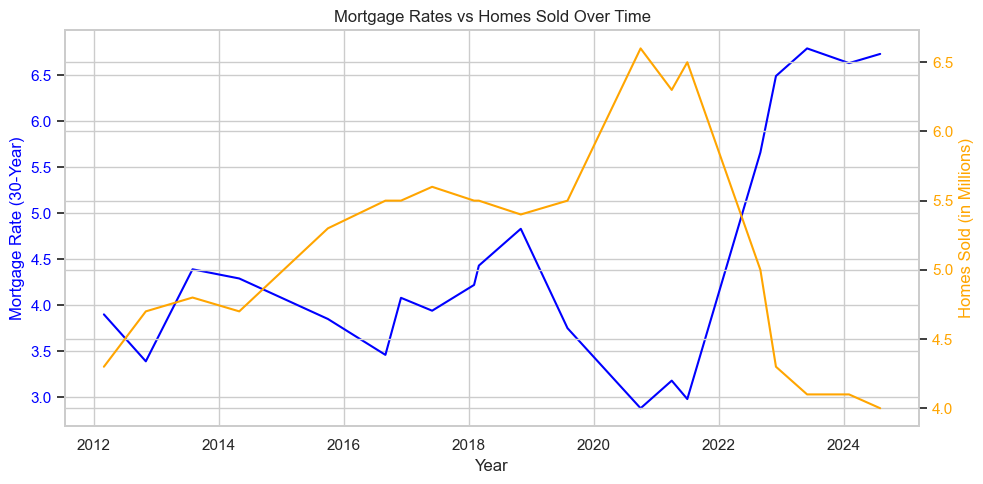

In [163]:
# Create a line chart with dual y-axes to clearly distinguish mortgage rates and homes sold
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Mortgage Rate (30-Year) on the left y-axis
ax1.plot(merged_data['DATE'], merged_data['MORTGAGE30US'], color='blue', label='Mortgage Rate (30-Year)')
ax1.set_xlabel("Year")
ax1.set_ylabel("Mortgage Rate (30-Year)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis to plot Homes Sold (in Millions)
ax2 = ax1.twinx()
ax2.plot(merged_data['DATE'], merged_data['Homes Sold(in M)'], color='orange', label='Homes Sold (in Millions)')
ax2.set_ylabel("Homes Sold (in Millions)", color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title and display the plot
plt.title("Mortgage Rates vs Homes Sold Over Time")
fig.tight_layout()
plt.show()
